АНАЛИЗ ДАННЫХ ИНФОРМАЦИОННОЙ БЕЗОПАСНОСТИ

✅ Данные загружены и преобразованы

1️⃣ ТАБЛИЦА 3.2 - Исходные данные
       Timestamp     User_ID     User_Role  Event_Type                   Resource    IP_Address  Data_Size_KB  Is_Anomaly
10.02.2026 09:15  IVANOV_ADM Администратор       LOGIN                      DC-01     10.10.1.5           NaN           0
10.02.2026 09:23  PETROV_BUH     Бухгалтер FILE_ACCESS   \\fs\finance\report.docx    10.10.2.10         120.0           0
10.02.2026 10:01 SIDOROV_DEV   Разработчик    DB_QUERY                    test_db    10.10.3.15          45.0           0
10.02.2026 03:02  IVANOV_ADM Администратор       LOGIN                      DC-01 185.124.33.12           NaN           1
10.02.2026 03:15  IVANOV_ADM Администратор    DB_QUERY                customer_db 185.124.33.12      150000.0           1
11.02.2026 14:30  PETROV_BUH     Бухгалтер FILE_ACCESS   \\fs\develop\source_code    10.10.2.10           5.0           1
11.02.2026 09:45 SMIRNOV_MGR     

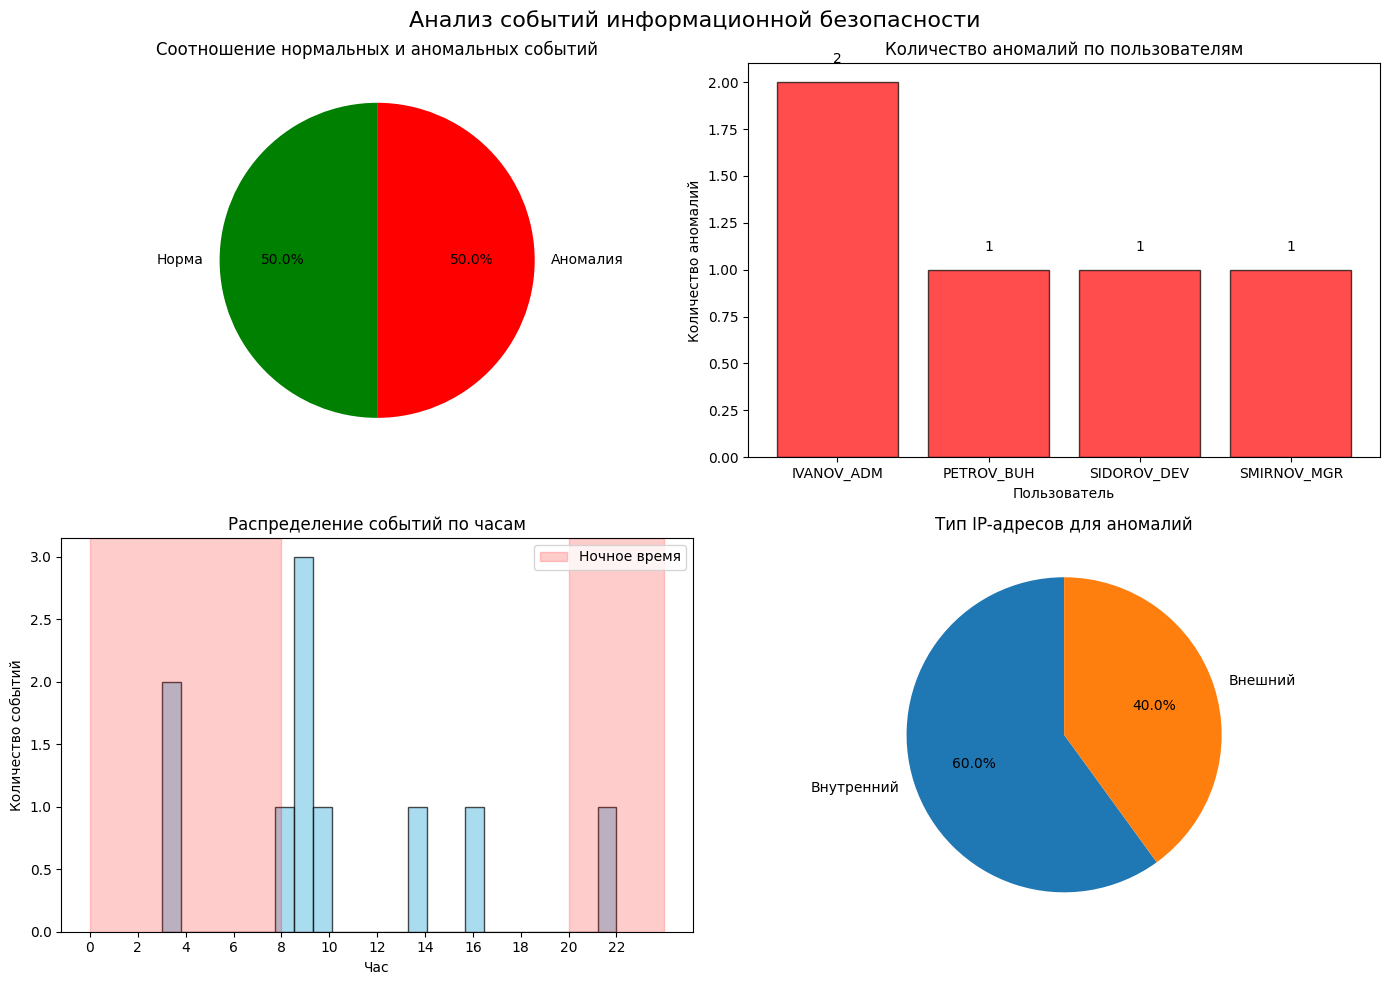


✅ График сохранен в файл: jupyter_analysis.png

4️⃣ ПРИМЕР ОБНАРУЖЕНИЯ АНОМАЛИЙ

📋 Профили пользователей (таблица 3.4):
  IVANOV_ADM: Администратор, работа 9-18, IP: 10.10.1.*
  PETROV_BUH: Бухгалтер, работа 9-18, IP: 10.10.2.*
  SIDOROV_DEV: Разработчик, работа 10-19, IP: 10.10.3.*
  SMIRNOV_MGR: Менеджер, работа 9-18, IP: 10.10.5.*

🔍 Анализ событий на соответствие профилям:
  10.02.2026 03:02 - IVANOV_ADM: 🔴 АНОМАЛИЯ
      Нарушения: Время (3:00), IP (185.124.33.12)
      Реальная метка: Аномалия
  10.02.2026 03:15 - IVANOV_ADM: 🔴 АНОМАЛИЯ
      Нарушения: Время (3:00), IP (185.124.33.12), Объем (150000.0 KB)
      Реальная метка: Аномалия
  11.02.2026 09:45 - SMIRNOV_MGR: 🔴 АНОМАЛИЯ
      Нарушения: Объем (25000.0 KB)
      Реальная метка: Аномалия
  11.02.2026 16:20 - IVANOV_ADM: 🟡 ПОДОЗРИТЕЛЬНО
      Нарушения: Объем (500.0 KB)
      Реальная метка: Норма
  11.02.2026 22:10 - PETROV_BUH: 🟡 ПОДОЗРИТЕЛЬНО
      Нарушения: Время (22:00)
      Реальная метка: Норма
  12.02.2026 08:5

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("=" * 60)
print("АНАЛИЗ ДАННЫХ ИНФОРМАЦИОННОЙ БЕЗОПАСНОСТИ")
print("=" * 60)

# Ваши данные из таблицы 3.2
data = [
    ['10.02.2026 09:15', 'IVANOV_ADM', 'Администратор', 'LOGIN', 'DC-01', '10.10.1.5', None, 0],
    ['10.02.2026 09:23', 'PETROV_BUH', 'Бухгалтер', 'FILE_ACCESS', '\\\\fs\\finance\\report.docx', '10.10.2.10', 120, 0],
    ['10.02.2026 10:01', 'SIDOROV_DEV', 'Разработчик', 'DB_QUERY', 'test_db', '10.10.3.15', 45, 0],
    ['10.02.2026 03:02', 'IVANOV_ADM', 'Администратор', 'LOGIN', 'DC-01', '185.124.33.12', None, 1],
    ['10.02.2026 03:15', 'IVANOV_ADM', 'Администратор', 'DB_QUERY', 'customer_db', '185.124.33.12', 150000, 1],
    ['11.02.2026 14:30', 'PETROV_BUH', 'Бухгалтер', 'FILE_ACCESS', '\\\\fs\\develop\\source_code', '10.10.2.10', 5, 1],
    ['11.02.2026 09:45', 'SMIRNOV_MGR', 'Менеджер', 'WEB_ACCESS', 'cloud-storage.ru/upload', '10.10.5.20', 25000, 1],
    ['11.02.2026 16:20', 'IVANOV_ADM', 'Администратор', 'FILE_ACCESS', '\\\\fs\\backup', '10.10.1.5', 500, 0],
    ['11.02.2026 22:10', 'PETROV_BUH', 'Бухгалтер', 'LOGIN', 'FS-01', '10.10.2.10', None, 0],
    ['12.02.2026 08:55', 'SIDOROV_DEV', 'Разработчик', 'FILE_ACCESS', '\\\\fs\\finance\\salaries.xlsx', '10.10.3.15', 2100, 1],
]

# Создаем DataFrame
columns = ['Timestamp', 'User_ID', 'User_Role', 'Event_Type', 'Resource', 'IP_Address', 'Data_Size_KB', 'Is_Anomaly']
df = pd.DataFrame(data, columns=columns)

# ПРЕОБРАЗОВАНИЕ ДАННЫХ
df['Hour'] = pd.to_datetime(df['Timestamp'], format='%d.%m.%Y %H:%M').dt.hour
df['IP_Type'] = df['IP_Address'].apply(lambda x: 'Внутренний' if str(x).startswith('10.') else 'Внешний')

print("\n✅ Данные загружены и преобразованы")
print("\n" + "=" * 60)
print("1️⃣ ТАБЛИЦА 3.2 - Исходные данные")
print("=" * 60)

print(df[['Timestamp', 'User_ID', 'User_Role', 'Event_Type', 'Resource', 'IP_Address', 'Data_Size_KB', 'Is_Anomaly']].to_string(index=False))
print("\n" + "=" * 60)
print("2️⃣ СТАТИСТИЧЕСКИЙ АНАЛИЗ")
print("=" * 60)

print(f"\n📊 Всего записей: {len(df)}")
print(f"📊 Аномалий: {df['Is_Anomaly'].sum()} из 10")
print(f"📊 Доля аномалий в выборке: {df['Is_Anomaly'].mean()*100:.1f}%")

print("\n📊 Распределение по пользователям:")
print(df['User_ID'].value_counts())

print("\n📊 Распределение по типам событий:")
print(df['Event_Type'].value_counts())

print("\n📊 Аномалии по пользователям:")
print(df[df['Is_Anomaly']==1]['User_ID'].value_counts())
print("\n" + "=" * 60)
print("3️⃣ СОЗДАНИЕ ГРАФИКОВ")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Анализ событий информационной безопасности', fontsize=16)

# График 1: Круговая диаграмма
axes[0, 0].pie(df['Is_Anomaly'].value_counts(), 
               labels=['Норма', 'Аномалия'],
               autopct='%1.1f%%',
               colors=['green', 'red'],
               startangle=90)
axes[0, 0].set_title('Соотношение нормальных и аномальных событий')

# График 2: Аномалии по пользователям
anomaly_by_user = df[df['Is_Anomaly']==1]['User_ID'].value_counts()
all_users = df['User_ID'].unique()
user_anomaly_counts = [anomaly_by_user.get(user, 0) for user in all_users]
bars = axes[0, 1].bar(all_users, user_anomaly_counts, color='red', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Количество аномалий по пользователям')
axes[0, 1].set_xlabel('Пользователь')
axes[0, 1].set_ylabel('Количество аномалий')
for bar, count in zip(bars, user_anomaly_counts):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, str(count), ha='center')

# График 3: Распределение по часам
axes[1, 0].hist(df['Hour'], bins=24, color='skyblue', edgecolor='black', alpha=0.7)
axes[1, 0].axvspan(0, 8, alpha=0.2, color='red', label='Ночное время')
axes[1, 0].axvspan(20, 24, alpha=0.2, color='red')
axes[1, 0].set_title('Распределение событий по часам')
axes[1, 0].set_xlabel('Час')
axes[1, 0].set_ylabel('Количество событий')
axes[1, 0].legend()
axes[1, 0].set_xticks(range(0, 24, 2))

# График 4: IP-адреса для аномалий
ip_types = df[df['Is_Anomaly']==1]['IP_Type'].value_counts()
if not ip_types.empty:
    axes[1, 1].pie(ip_types.values, labels=ip_types.index, autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Тип IP-адресов для аномалий')
else:
    axes[1, 1].text(0.5, 0.5, 'Нет данных', ha='center', va='center')
    axes[1, 1].set_title('Тип IP-адресов для аномалий')

plt.tight_layout()
plt.savefig('jupyter_analysis.png', dpi=150)
plt.show()

print("\n✅ График сохранен в файл: jupyter_analysis.png")
print("\n" + "=" * 60)
print("4️⃣ ПРИМЕР ОБНАРУЖЕНИЯ АНОМАЛИЙ")
print("=" * 60)

# Профили пользователей (таблица 3.4)
profiles = {
    'IVANOV_ADM': {'role': 'Администратор', 'work_hours': (9, 18), 'internal_ip': '10.10.1.', 'avg_volume': 150},
    'PETROV_BUH': {'role': 'Бухгалтер', 'work_hours': (9, 18), 'internal_ip': '10.10.2.', 'avg_volume': 95},
    'SIDOROV_DEV': {'role': 'Разработчик', 'work_hours': (10, 19), 'internal_ip': '10.10.3.', 'avg_volume': 30},
    'SMIRNOV_MGR': {'role': 'Менеджер', 'work_hours': (9, 18), 'internal_ip': '10.10.5.', 'avg_volume': 500}
}

print("\n📋 Профили пользователей (таблица 3.4):")
for user, profile in profiles.items():
    print(f"  {user}: {profile['role']}, работа {profile['work_hours'][0]}-{profile['work_hours'][1]}, IP: {profile['internal_ip']}*")

print("\n🔍 Анализ событий на соответствие профилям:")

for idx, event in df.iterrows():
    user = event['User_ID']
    profile = profiles.get(user)
    if not profile:
        continue
    
    anomalies_found = []
    hour = event['Hour']
    ip = event['IP_Address']
    volume = event['Data_Size_KB']
    
    if hour < profile['work_hours'][0] or hour > profile['work_hours'][1]:
        anomalies_found.append(f"Время ({hour}:00)")
    
    if not str(ip).startswith(profile['internal_ip']):
        anomalies_found.append(f"IP ({ip})")
    
    if volume and volume > profile['avg_volume'] * 2:
        anomalies_found.append(f"Объем ({volume} KB)")
    
    if anomalies_found:
        status = "🔴 АНОМАЛИЯ" if event['Is_Anomaly'] == 1 else "🟡 ПОДОЗРИТЕЛЬНО"
        print(f"  {event['Timestamp']} - {user}: {status}")
        print(f"      Нарушения: {', '.join(anomalies_found)}")
        print(f"      Реальная метка: {'Аномалия' if event['Is_Anomaly']==1 else 'Норма'}")
print("\n" + "=" * 60)
print("✅ АНАЛИЗ ЗАВЕРШЕН")
print("=" * 60)
print("\nВсе части выполнены успешно!")

In [2]:
# Сохранить таблицу в файл
df.to_csv('tablica_3_2.csv', index=False)

# Сохранить график отдельно (уже сохранился как jupyter_analysis.png)
# Можно скачать через меню Jupyter: File → Download as